# Introduction

LingualSense is a language detection tool that uses Machine Learning (ML) models to predict the language of any given text. By leveraging models like Logistic Regression, Naive Bayes, Random Forest, and Ridge Classifier, it accurately identifies a wide range of languages in real-time.

Designed for ease of use, LingualSense processes text, detects language, and provides predictions quickly and efficiently. It supports numerous languages and is ideal for applications in text classification, sentiment analysis, and multilingual data handling.

Key Features:

* Real-time Language Detection: Detect the language of any input text in real-time.
* Multiple Model Support: Combines several powerful ML models for robust predictions.
* Wide Language Coverage: Supports a broad range of languages and dialects.
* Accuracy and Efficiency: Provides accurate predictions with high processing speed.

# Importing Necessary Libraries

Here, we importing the necessary libraries for data preprocessing, visualization, and encoding. These libraries provide essential tools for handling data and implementing the required transformations.

In [ ]:
import re
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import LabelEncoder

# Loading the Dataset

To begin working with the dataset, we first need to load the preprocessed version of the dataset, referred to as cleaned_dataset. This dataset has already been cleaned and processed to remove noise, such as special characters, extra spaces, and irrelevant information, making it ready for analysis and model training.

Here’s how you can load the `cleaned_dataset`:

In [ ]:
df = pd.read_csv("/content/cleaned_dataset (2).csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32337 entries, 0 to 32336
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Text          32337 non-null  object
 1   Language      32337 non-null  object
 2   Cleaned_Text  32336 non-null  object
dtypes: object(3)
memory usage: 758.0+ KB


Exploring the Dataset:

In [ ]:
print(df.head(10))

                                                Text  Language  \
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian   
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish   
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai   
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil   
4  de spons behoort tot het geslacht haliclona en...     Dutch   
5  エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...  Japanese   
6  tsutinalar i̇ngilizce tsuutina kanadada albert...   Turkish   
7  müller mox figura centralis circulorum doctoru...     Latin   
8  برقی بار electric charge تمام زیرجوہری ذرات کی...      Urdu   
9  シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...  Japanese   

                                        Cleaned_Text  
0  klement gottwaldi surnukeha palsameeriti ning ...  
1  sebes joseph pereira thomas  på eng the jesuit...  
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...  
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர... 

In this code:

* The dataset is loaded using `pd.read_csv()`, which reads the CSV file into a Pandas DataFrame.
* The `.head()` method displays the first few rows of the dataset, allowing you to preview the data.
* The `.info()` method provides an overview of the dataset, including the number of entries, column names, data types, and any missing values.

# Loading Label Encoder

In machine learning workflows, label encoding is commonly used to convert categorical labels (such as languages) into numerical values that can be processed by models. The LabelEncoder helps in this transformation by assigning unique integers to each category. In this step, we will load a pre-trained `LabelEncoder` stored using `joblib`, and visualize the encoding of the `Language column` in a dataset.

Steps:
* Load the Label Encoder: We will load the stored `LabelEncoder` object using `joblib`.
* Encode the Language Column: Use the loaded `LabelEncoder` to transform the categorical language labels into numerical values.
* Visualize the Results: Display the first 20 rows of the original and encoded language labels to verify the encoding.

Here’s the code to perform these steps:

In [ ]:
Label_encoder = joblib.load('label_encoder (1).joblib')
df['language_encoded'] = Label_encoder.fit_transform(df['Language'])
# Display the mapping of labels to encoded values
label_mapping = dict(zip(Label_encoder.classes_, Label_encoder.transform(Label_encoder.classes_)))
print("Label Encoding Mapping:", label_mapping)

# Display the first few rows with the encoded column
print(df[['Language', 'language_encoded']].head(20))

Label Encoding Mapping: {'Arabic': 0, 'Chinese': 1, 'Danish': 2, 'Dutch': 3, 'English': 4, 'Estonian': 5, 'French': 6, 'German': 7, 'Greek': 8, 'Hindi': 9, 'Indonesian': 10, 'Italian': 11, 'Japanese': 12, 'Kannada': 13, 'Korean': 14, 'Latin': 15, 'Malayalam': 16, 'Persian': 17, 'Portugeese': 18, 'Portugese': 19, 'Pushto': 20, 'Romanian': 21, 'Russian': 22, 'Spanish': 23, 'Swedish': 24, 'Sweedish': 25, 'Tamil': 26, 'Thai': 27, 'Turkish': 28, 'Urdu': 29}
      Language  language_encoded
0     Estonian                 5
1      Swedish                24
2         Thai                27
3        Tamil                26
4        Dutch                 3
5     Japanese                12
6      Turkish                28
7        Latin                15
8         Urdu                29
9     Japanese                12
10  Indonesian                10
11   Portugese                19
12      French                 6
13     Chinese                 1
14      Korean                14
15        Thai 

## Explanation:
* `joblib.load()` is used to load the pre-trained LabelEncoder object from a file.
* `df['language_encoded']`: This column stores the encoded values for the Language column using the loaded LabelEncoder.
* `print(df[['Language', 'language_encoded']].head(20))`: This prints the first 20 rows of the dataset, showing the original language and its corresponding encoded value.

Ensure that the path_to_label_encoder.joblib points to the correct location where your LabelEncoder is saved.

# Feature extraction

## TF-IDF (Term Frequency-Inverse Document Frequency)

TF-IDF is a technique used to transform text data into a numerical representation, highlighting important terms in a document while downplaying common ones.

TF-IDF is a statistical technique used to evaluate how important a word is to a document in a collection or corpus. It's widely used for text mining and information retrieval, as it helps convert raw text data into numerical vectors that machine learning models can understand.

Steps:
* Handling Missing Values: Fill any missing values in the text column with empty strings.
* Create TF-IDF Model: Convert text into a `TF-IDF` matrix.
* Limit Features: Restrict the features to the top `5000` terms.
* Convert to DataFrame: Convert the sparse matrix to a DataFrame for better readability.

In [ ]:
# Replace NaN values with an empty string
df['Cleaned_Text'] = df['Cleaned_Text'].fillna('')

# Create a TF-IDF model
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_Text'])

# Feature names
print("TF-IDF Feature Names:", tfidf_vectorizer.get_feature_names_out())

# Sparse matrix shape
print("TF-IDF Shape:", tfidf_matrix.shape)

TF-IDF Feature Names: ['00' '000' '000க' ... 'ﻻﺗﺮﺍﻭﺳﻪ' 'ﻻﺳﻮﻧﻪ' 'ｄｅａ論文']
TF-IDF Shape: (32337, 299316)


## Applying TF-IDF with Feature Limitation

In this section, we apply the TF-IDF transformation on the text data while limiting the number of features (terms) to the top 5000 most important words. This helps to manage the dimensionality of the data and focuses on the most relevant terms for further analysis. The transformed data is then converted into a DataFrame for easier interpretation and manipulation.

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf = tfidf_vectorizer.fit_transform(df['Cleaned_Text'])
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_df

,000,10,100,15,20,2001,2002,2003,2004,2005,...,하는,하였다,하지만,한다,한편,함께,했다,현재,호드의,힘을
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Machine Learning Models for Language Prediction

In this section, we apply various machine learning models to classify text data. The models are trained using preprocessed features, such as TF-IDF vectors, and are evaluated based on their ability to accurately classify the input text.

## Train-Test Split

* `Input Features and Target Labels`: The input features (X) are the text data, while the target labels (y) are the encoded language labels.

* `Splitting the Data`: The dataset is divided into training and testing sets using the train_test_split function, with 67.5% of the data used for training and 32.5% reserved for testing.

* `Randomization`: The data is shuffled to ensure randomness before splitting, preventing any biases in the model's performance evaluation.

* `Test Set Size`: The number of samples in both the training and test sets is printed, confirming the split ratio.

In [ ]:
from sklearn.model_selection import train_test_split

# Features (text data) and labels (language)
X = df['Cleaned_Text']  # Input features
y = df['language_encoded']  # Target labels (encoded language column)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.325000000000000001,
                                                    random_state=2551,
                                                    shuffle=True)

print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 21827
Test set size: 10510


### Transform text data using TF-IDF for train & test

* TF-IDF Vectorization: `TfidfVectorizer` converts text into numerical features.
* Training Data: `fit_transform` is applied to the training set (`X_train`) to learn and transform.
* Testing Data: `transform` is applied to the test set (`X_test`) using the learned vocabulary.

This ensures consistent representation of both training and test data.

In [ ]:
# Transform text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Train multiple classifiers

### Logistic Regression
A linear model used for binary or multiclass classification, applying a logistic function to predict probabilities.



In [ ]:
from sklearn.metrics import accuracy_score, log_loss

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)
lr_preds = lr_model.predict(X_test_tfidf)

# Evaluate Logistic Regression
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, lr_preds))


Logistic Regression Accuracy: 0.9379638439581351


### Naive Bayes
A probabilistic classifier based on Bayes' theorem, ideal for text classification tasks, assuming feature independence.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_preds = nb_model.predict(X_test_tfidf)

# Evaluate Naive Bayes
print("\nNaive Bayes Accuracy:", accuracy_score(y_test, nb_preds))


Naive Bayes Accuracy: 0.9059942911512845


### Random Forest
An ensemble method that builds multiple decision trees and combines their outputs for more accurate predictions.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_preds = rf_model.predict(X_test_tfidf)

# Evaluate Random Forest
print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_preds))


Random Forest Accuracy: 0.9029495718363464


### Ridge Classifier
A linear classifier that applies regularization (Ridge) to the logistic regression model, reducing overfitting.

In [ ]:
from sklearn.linear_model import RidgeClassifier

# Ridge Classifier
rc_model = RidgeClassifier()
rc_model.fit(X_train_tfidf, y_train)
rc_preds = rc_model.predict(X_test_tfidf)

# Evaluate Ridge Classifier
print("\nRidge Classifier Accuracy:", accuracy_score(y_test, rc_preds))


Ridge Classifier Accuracy: 0.9580399619410086


## Compare Performance

In this section, we evaluate the performance of the trained models using two methods:
1. Accuracy Comparison: A bar plot is used to visually compare the accuracy scores of each model (Logistic Regression, Naive Bayes, Random Forest, and Ridge Classifier). The plot helps to easily identify which model performed the best in terms of accuracy.


In [ ]:
# Compute log loss for models with probability predictions
lr_loss = log_loss(y_test, lr_model.predict_proba(X_test_tfidf))
nb_loss = log_loss(y_test, nb_model.predict_proba(X_test_tfidf))
rf_loss = log_loss(y_test, rf_model.predict_proba(X_test_tfidf))

# Model results
results = {
    "Model": ["Logistic Regression", "Naive Bayes", "Random Forest", "Ridge Classifier"],
    "Accuracy": [
        accuracy_score(y_test, lr_preds),
        accuracy_score(y_test, nb_preds),
        accuracy_score(y_test, rf_preds),
        accuracy_score(y_test, rc_preds),
    ],
    "Log Loss": [lr_loss, nb_loss, rf_loss, "N/A"]
}

# Create a DataFrame
results_df = pd.DataFrame(results)

# Display the table
print(results_df)


                 Model  Accuracy  Log Loss
0  Logistic Regression  0.937964  0.526068
1          Naive Bayes  0.905994  0.608363
2        Random Forest  0.902950  1.396073
3     Ridge Classifier  0.958040       N/A


<ipython-input-48-7fdad234e584>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


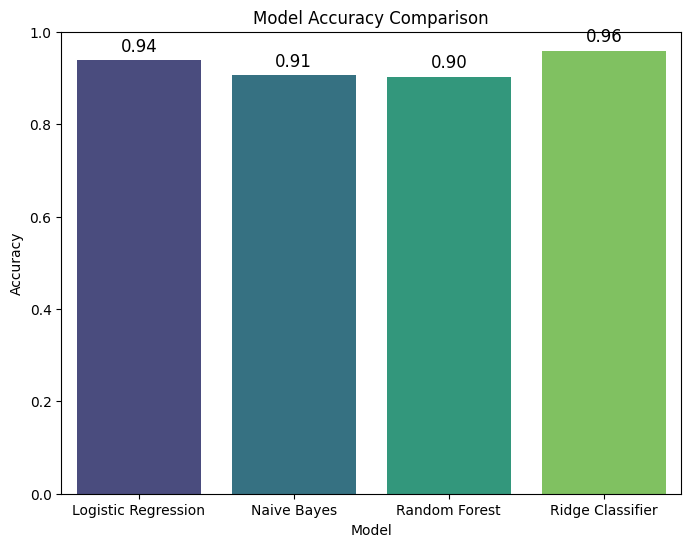

In [ ]:
# Accuracy Comparison
model_names = results_df['Model']
accuracies = results_df['Accuracy']

# Bar Plot for Accuracy Comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha="center", fontsize=12)
plt.show()

2. Confusion Matrices: We generate confusion matrices for each model to better understand their classification performance. The confusion matrix shows how well each model's predictions match the actual labels, providing insights into misclassifications and errors.

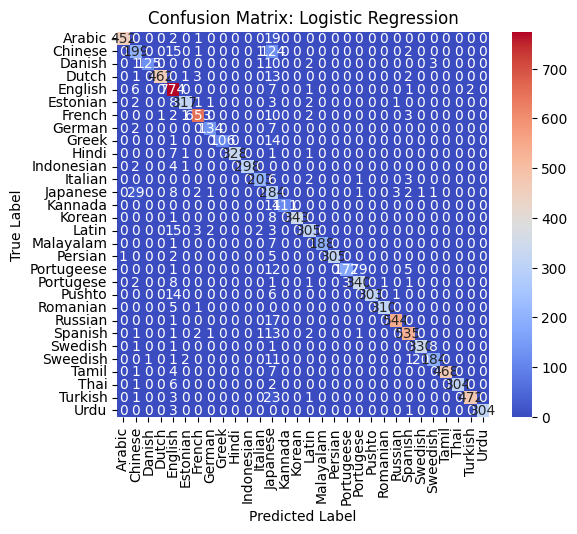

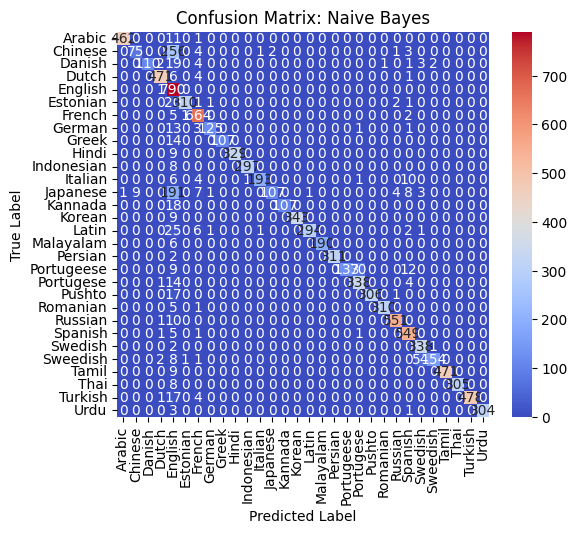

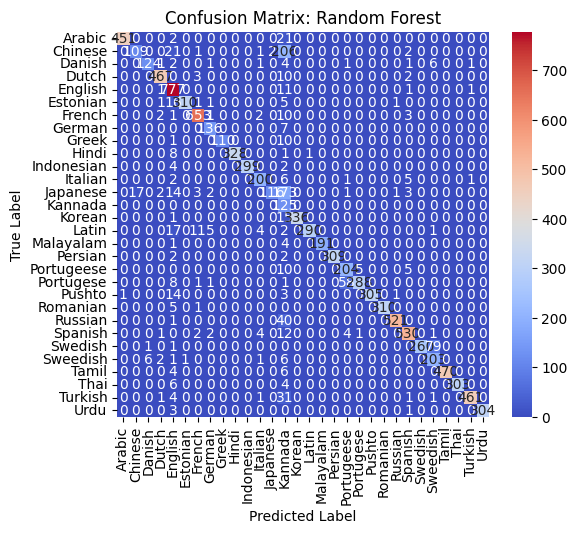

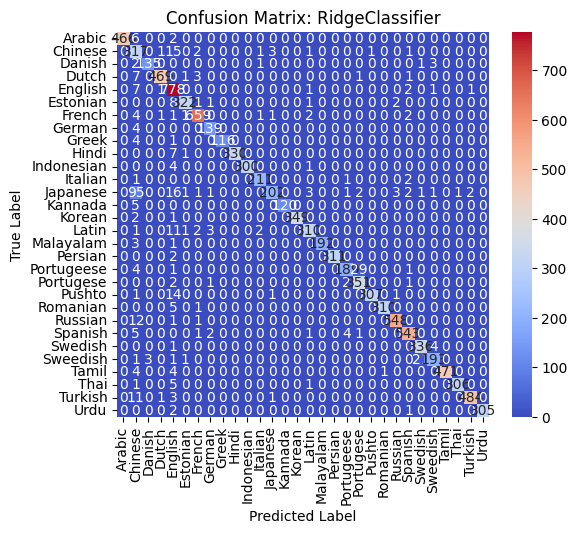

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrices
models = {'Logistic Regression': lr_preds, 'Naive Bayes': nb_preds, 'Random Forest': rf_preds, 'RidgeClassifier':rc_preds }
for model_name, predictions in models.items():
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=Label_encoder.classes_, yticklabels=Label_encoder.classes_)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

## Combined Classification Report

In [ ]:
from sklearn.metrics import classification_report

# Get classification reports for all models
lr_report = classification_report(y_test, lr_preds, target_names=Label_encoder.classes_, output_dict=True)
nb_report = classification_report(y_test, nb_preds, target_names=Label_encoder.classes_, output_dict=True)
rf_report = classification_report(y_test, rf_preds, target_names=Label_encoder.classes_, output_dict=True)
rc_report = classification_report(y_test, rc_preds, target_names=Label_encoder.classes_, output_dict=True)

# Convert reports into DataFrames
lr_df = pd.DataFrame(lr_report).transpose()
nb_df = pd.DataFrame(nb_report).transpose()
rf_df = pd.DataFrame(rf_report).transpose()
rc_df = pd.DataFrame(rc_report).transpose()

# Combine all reports into a single DataFrame
combined_report = pd.concat([lr_df['precision'], nb_df['precision'], rf_df['precision'], rc_df['precision']],
                            axis=1, keys=['Logistic Regression', 'Naive Bayes', 'Random Forest', 'RidgeClassifier'])

# Print combined report
print("Combined Classification Report:")
print(combined_report)


Combined Classification Report:
              Logistic Regression  Naive Bayes  Random Forest  RidgeClassifier
Arabic                   0.997792     0.997840       0.997788         1.000000
Chinese                  0.799197     0.892857       0.865079         0.637827
Danish                   0.992063     1.000000       0.946565         0.978261
Dutch                    0.997840     0.981250       0.976987         0.991543
English                  0.871622     0.521452       0.848253         0.878104
Estonian                 0.981424     0.993590       0.996785         0.981707
French                   0.979010     0.941844       0.965976         0.982116
German                   0.964029     0.976562       0.912752         0.945578
Greek                    1.000000     1.000000       1.000000         1.000000
Hindi                    1.000000     1.000000       1.000000         1.000000
Indonesian               1.000000     0.996644       1.000000         1.000000
Italian             

# Custom Language Prediction

In this section, we enable custom text input to predict the language using the trained machine learning models. Users can enter any sentence, and the models will classify the text into the appropriate language.

In [ ]:
languages_dict = {
    "English": "Hello and welcome to the text classifier! This tool is designed to help you analyze and categorize text into different languages or topics with ease and accuracy. We hope you find it useful and enjoyable!",
    "French": "Bonjour et bienvenue dans le classificateur de texte ! Cet outil est conçu pour vous aider à analyser et à classer les textes dans différentes langues ou sujets avec simplicité et précision. Nous espérons que vous le trouverez utile et agréable !",
    "Spanish": "¡Hola y bienvenido al clasificador de texto! Esta herramienta está diseñada para ayudarte a analizar y categorizar texto en diferentes idiomas o temas con facilidad y precisión. ¡Esperamos que te sea útil y agradable!",
    "Russian": "Здравствуйте и добро пожаловать в классификатор текста! Этот инструмент создан для того, чтобы помочь вам анализировать и классифицировать текст на разные языки или темы легко и точно. Надеемся, вам понравится его использовать!",
    "Dutch": "Hallo en welkom bij de tekstclassifier! Deze tool is ontworpen om je te helpen tekst eenvoudig en nauwkeurig te analyseren en in verschillende talen of onderwerpen te classificeren. We hopen dat je het nuttig en prettig vindt!",
    "Arabic": "مرحبًا وأهلاً بك في مصنف النصوص! تم تصميم هذه الأداة لمساعدتك على تحليل النصوص وتصنيفها إلى لغات أو موضوعات مختلفة بسهولة ودقة. نأمل أن تجدها مفيدة وممتعة!",
    "Turkish": "Merhaba ve metin sınıflandırıcısına hoş geldiniz! Bu araç, metinleri kolayca ve doğru bir şekilde analiz etmenize ve farklı dillere veya konulara sınıflandırmanıza yardımcı olmak için tasarlanmıştır. Umarız faydalı ve keyifli bulursunuz!",
    "Tamil": "வணக்கம், உரை வகைப்பாட்டிக்கு வரவேற்கிறோம்! இந்த கருவி உங்களுக்கு உரையை எளிதாகவும் துல்லியமாகவும் வகைப்படுத்த மற்றும் பகுப்பாய்வு செய்ய உதவும் வகையில் வடிவமைக்கப்பட்டுள்ளது. இதை நீங்கள் பயனுள்ளதாகவும் மகிழ்ச்சியுடனும் பார்க்கிறீர்கள் என்று நம்புகிறோம்!",
    "Hindi": "नमस्ते, पाठ वर्गीकरणकर्ता में आपका स्वागत है! यह उपकरण आपको आसानी और सटीकता के साथ पाठ का विश्लेषण और वर्गीकरण करने में मदद करने के लिए डिज़ाइन किया गया है। हमें उम्मीद है कि आप इसे उपयोगी और आनंददायक पाएंगे!",
    "Persian": "سلام و به دسته‌بندی‌کننده متن خوش آمدید! این ابزار برای کمک به شما در تحلیل و طبقه‌بندی متن به زبان‌ها یا موضوعات مختلف با سهولت و دقت طراحی شده است. امیدواریم که برای شما مفید و لذت‌بخش باشد!",
    "Thai": "สวัสดีและยินดีต้อนรับสู่ตัวจัดหมวดหมู่ข้อความ! เครื่องมือนี้ได้รับการออกแบบมาเพื่อช่วยให้คุณวิเคราะห์และจัดประเภทข้อความเป็นภาษาหรือหัวข้อต่าง ๆ ได้อย่างง่ายดายและแม่นยำ เราหวังว่าคุณจะพบว่ามีประโยชน์และสนุกสนาน!",
    "Japanese": "こんにちは、テキスト分類器へようこそ！このツールは、テキストを簡単かつ正確に分析し、さまざまな言語やトピックに分類するお手伝いをするために設計されています。ぜひお楽しみください！",
    "Urdu": "ہیلو، متن کے درجہ بندی میں خوش آمدید! یہ ٹول آپ کو متن کو مختلف زبانوں یا موضوعات میں آسانی اور درستگی کے ساتھ تجزیہ اور درجہ بندی کرنے میں مدد دینے کے لیے ڈیزائن کیا گیا ہے۔ ہم امید کرتے ہیں کہ آپ اسے مفید اور لطف اندوز پائیں گے!",
    "Chinese": "你好，欢迎使用文本分类器！此工具旨在帮助您轻松、准确地分析和分类文本为不同的语言或主题。希望您觉得它既有用又愉快！",
    "Korean": "안녕하세요, 텍스트 분류기에 오신 것을 환영합니다! 이 도구는 텍스트를 쉽게 분석하고 다양한 언어 또는 주제로 분류할 수 있도록 설계되었습니다. 유용하고 즐거운 도구가 되길 바랍니다!",
    "Romanian": "Bună și bine ai venit la clasificatorul de text! Acest instrument este conceput pentru a te ajuta să analizezi și să clasifici textele în diferite limbi sau subiecte cu ușurință și precizie. Sperăm să-ți fie util și plăcut!",
    "Estonian": "Tere ja tere tulemast tekstiklassifikaatorisse! See tööriist on loodud selleks, et aidata teil teksti hõlpsalt ja täpselt analüüsida ning liigitada erinevatesse keeltesse või teemadesse. Loodame, et see on teile kasulik ja nauditav!",
    "Portuguese": "Olá e bem-vindo ao classificador de texto! Esta ferramenta foi projetada para ajudá-lo a analisar e categorizar textos em diferentes idiomas ou tópicos com facilidade e precisão. Esperamos que você a ache útil e agradável!",
    "Pushto": "سلام، د متن کټګورۍ ته ښه راغلاست! دا وسیله ستاسو لپاره په اسانۍ او دقت سره د متن تحلیل او طبقه بندي کولو لپاره ډیزاین شوې ده. هیله لرو چې ګټوره او خوندوره وي!",
    "Swedish": "Hej och välkommen till textklassificeraren! Det här verktyget är utformat för att hjälpa dig att analysera och klassificera text på olika språk eller ämnen enkelt och exakt. Vi hoppas att du finner det användbart och trevligt!",
    "Indonesian": "Halo dan selamat datang di pengklasifikasi teks! Alat ini dirancang untuk membantu Anda menganalisis dan mengategorikan teks ke dalam berbagai bahasa atau topik dengan mudah dan akurat. Kami harap Anda menemukannya berguna dan menyenangkan!",
    "Latin": "Salve et grata ad textum classifier! Hoc instrumentum destinatum est ut te adiuvet ad textus facile et accurate in varias linguas vel themata digerendas. Speramus utile et iucundum fore!",
    "Italian": "Ciao e benvenuto nel classificatore di testo! Questo strumento è progettato per aiutarti ad analizzare e classificare i testi in diverse lingue o argomenti in modo semplice e accurato. Speriamo che lo trovi utile e piacevole!",
    "Malayalam": "ഹലോ, ടെക്സ്റ്റ് ക്ലാസിഫയറിലേക്ക് സ്വാഗതം! ഈ ഉപകരണം ടെക്സ്റ്റ് വിശകലനം ചെയ്യാനും അതിനെ വിവിധ ഭാഷകളിലേക്കോ വിഷയങ്ങളിലേക്കോ എളുപ്പത്തിൽവും കൃത്യതയോടെയും തരംതിരിക്കാനുമായി രൂപകല്പന ചെയ്തതാണ്. ഇത് നിങ്ങള്ക്ക് പ്രയോജനകരവും രസകരവുമാകുമെന്ന് പ്രതീക്ഷിക്കുന്നു!",
    "German": "Hallo und willkommen beim Textklassifikator! Dieses Tool wurde entwickelt, um Ihnen zu helfen, Texte einfach und präzise zu analysieren und in verschiedene Sprachen oder Themen zu kategorisieren. Wir hoffen, dass Sie es nützlich und angenehm finden!",
    "Danish": "Hej og velkommen til tekstklassifikatoren! Dette værktøj er designet til at hjælpe dig med at analysere og klassificere tekst i forskellige sprog eller emner nemt og præcist. Vi håber, at du finder det nyttigt og behageligt!",
    "Kannada": "ನಮಸ್ಕಾರ, ಪಠ್ಯದ ವರ್ಗೀಕರಕಕ್ಕೆ ಸ್ವಾಗತ! ಈ ಸಾಧನವು ಪಠ್ಯವನ್ನು ಸುಲಭವಾಗಿ ಮತ್ತು ನಿಖರವಾಗಿ ವಿಶ್ಲೇಷಿಸಲು ಮತ್ತು ವಿಭಿನ್ನ ಭಾಷೆಗಳಲ್ಲಿಗೆ ಅಥವಾ ವಿಷಯಗಳಿಗೆ ವರ್ಗೀಕರಿಸಲು ನಿಮಗೆ ಸಹಾಯ ಮಾಡಲು ವಿನ್ಯಾಸಗೊಳಿಸಲಾಗಿದೆ. ಇದು ನಿಮಗೆ ಉಪಯುಕ್ತ ಮತ್ತು ಆನಂದದಾಯಕವಾಗುತ್ತದೆ ಎಂದು ನಾವು ಭಾವಿಸುತ್ತೇವೆ!",
    "Greek": "Γεια σας και καλώς ήρθατε στον ταξινομητή κειμένου! Αυτό το εργαλείο έχει σχεδιαστεί για να σας βοηθήσει να αναλύετε και να ταξινομείτε κείμενα σε διαφορετικές γλώσσες ή θέματα εύκολα και με ακρίβεια. Ελπίζουμε να το βρείτε χρήσιμο και ευχάριστο!"
}

## Text Cleaning Function

The `clean_text` function preprocesses text by:

* Removing backslashes, numbers, and special characters.
* Replacing line breaks with spaces.
* Reducing multiple spaces to one and stripping extra spaces.

This ensures the text is clean and ready for model predictions.

In [ ]:
# Function to clean the input text
def clean_text(text):
    """
    Cleans the input text by:
    - Removing backslashes, numeric characters, and special characters.
    - Replacing line breaks with a space.
    - Reducing multiple spaces to a single space.
    - Stripping leading and trailing spaces.
    """
    text = re.sub(r'\\', '', text)  # Remove backslashes
    text = re.sub(r'\n', ' ', text)  # Replace line breaks with a space
    text = re.sub(r'\d+', ' ', text)  # Remove numeric characters
    text = re.sub(r'[^\w\s]', '', text, flags=re.UNICODE)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Reduce multiple spaces
    return text

## Sentiment Prediction Function

The `predict_sentiment` function:

* Cleans the input text using the `clean_text` function.
* Transforms the cleaned text using the TF-IDF vectorizer.
* Makes predictions using multiple models: Logistic Regression, Naive Bayes, Random Forest, and Ridge Classifier.
* Decodes the predicted labels into human-readable language or sentiment categories.

It returns a dictionary with model names as keys and their corresponding predicted language or sentiment as values.

In [ ]:
# Function to predict sentiment using multiple models
def predict_sentiment(text):
    """
    Predict sentiment using multiple models for the given input text.
    Arguments:
    text (str): The input text for prediction.
    Returns:
    dict: A dictionary with model names as keys and predicted language as values.
    """
    # Clean the text before prediction
    cleaned_text = clean_text(text)

    # Convert the cleaned text to a list (required for the model)
    text_counts = tfidf_vectorizer.transform([cleaned_text])

    # Prediction processing for each model
    predictions = {
        'Logistic Regression': lr_model.predict(text_counts),
        'Naive Bayes': nb_model.predict(text_counts),
        'Random Forest': rf_model.predict(text_counts),
        'RidgeClassifier': rc_model.predict(text_counts)
    }

    # Decode predictions (for language prediction or sentiment categories)
    decoded_predictions = {
        model: Label_encoder.inverse_transform(pred)[0] for model, pred in predictions.items()
    }

    return decoded_predictions

## Testing Languages and Creating a Prediction Table

The function `test_languages_and_create_table` performs the following steps:

* Iterates over each language in the `languages_dict`, using its associated sentence for prediction.
* Predicts sentiment for each language using multiple models (Logistic Regression, Naive Bayes, Random Forest, and Ridge Classifier).
* Collects the predicted languages for each model and stores them in a row with the actual language.
* The results are stored in a DataFrame, with the correct language as the index and each model's predictions as columns.

This table provides insights into how each model performs when predicting the language of text samples from `languages_dict`.








In [ ]:
pip install langdetect

In [ ]:
from langdetect import detect

# Function to test each language from `languages_dict` and predict sentiment
def test_languages_and_create_table():
    """
    Tests each language in `languages_dict` and predicts sentiment for each using multiple models.
    Returns a DataFrame with languages as rows and model names as columns with predicted languages.
    """
    # Initialize an empty list to hold the results
    results = []

    # Iterate over each language and its text in `languages_dict`
    for language, sentence in languages_dict.items():
        # Get predictions for the sentence in each model
        predictions = predict_sentiment(sentence)

        # Collect the predicted languages for each model
        result_row = {model: pred for model, pred in predictions.items()}

        # Add the result row with the correct language to the results list
        result_row['Language'] = language

        # Append to the results list
        results.append(result_row)

    # Create a DataFrame from the results
    prediction_df = pd.DataFrame(results)
    prediction_df.set_index('Language', inplace=True)

    return prediction_df

# Call the function to generate the prediction table
prediction_table = test_languages_and_create_table()

# Display the result in a table format
print("\nSentiment Prediction Table with Predicted Language for Each Model:")
print(prediction_table)


Sentiment Prediction Table with Predicted Language for Each Model:
           Logistic Regression Naive Bayes Random Forest RidgeClassifier
Language                                                                
English                English     English       English         English
French                  French      French        French          French
Spanish                Spanish     Spanish       Spanish         Spanish
Russian                Russian     Russian       Russian         Russian
Dutch                    Dutch       Dutch         Dutch           Dutch
Arabic                  Arabic      Arabic        Arabic          Arabic
Turkish                Turkish     Turkish       Turkish         Turkish
Tamil                    Tamil       Tamil         Tamil           Tamil
Hindi                    Hindi       Hindi         Hindi           Hindi
Persian                Persian     Persian       Persian         Persian
Thai                  Japanese     English       Kannada

## Language Prediction Performance Across Multiple Models

Explanation:
* prediction_table_encoded: The table's language predictions are transformed into numerical values using Label_encoder.transform() to * prepare them for visualization.
* sns.heatmap: The heatmap function plots the predictions for each language and model, where the darker blue shades indicate correct predictions, and lighter shades show misclassifications.
* Annotations (annot=True): Displays the values inside each cell for easy interpretation of predictions.

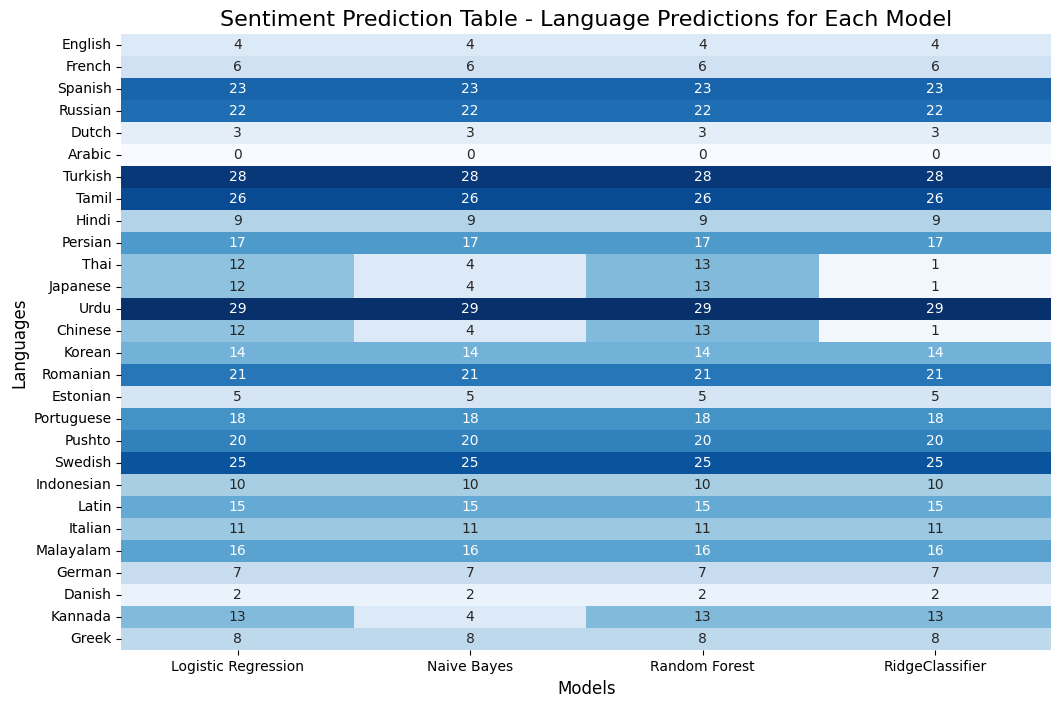

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the prediction table into a format suitable for a heatmap (e.g., a 2D matrix)
# For heatmap, we need to use numerical encoding for predicted languages (use Label_encoder for that)
prediction_table_encoded = prediction_table.apply(Label_encoder.transform)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(prediction_table_encoded, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=prediction_table.columns, yticklabels=prediction_table.index)

# Set plot labels and title
plt.title("Sentiment Prediction Table - Language Predictions for Each Model", fontsize=16)
plt.ylabel("Languages", fontsize=12)
plt.xlabel("Models", fontsize=12)

# Display the heatmap
plt.show()


## Custom_predict_sentence

In [ ]:
def Custom_predict_sentiment(text):
    """
    Predict sentiment using multiple models for the given input text.

    Args:
    text (str): The input text for prediction.

    var:
    tfidf_vectorizer (TfidfVectorizer): The TF-IDF vectorizer used to transform the text.
    lr_model (LogisticRegression): The trained Logistic Regression model.
    nb_model (MultinomialNB): The trained Naive Bayes model.
    rf_model (RandomForestClassifier): The trained Random Forest model.
    rc_model (RidgeClassifier): The trained Ridge Classifier model.
    label_encoder (LabelEncoder): The label encoder used to decode model predictions.

    Returns:
    None: Prints the predictions from each model.
    """
    # Convert input text to a list (required for the model)
    text = clean_text(text)

    # Transform the text using the TF-IDF vectorizer
    text_counts = tfidf_vectorizer.transform(text)

    # Prediction processing for each model
    lr_prediction = lr_model.predict(text_counts)
    nb_prediction = nb_model.predict(text_counts)
    rf_prediction = rf_model.predict(text_counts)
    rc_prediction = rc_model.predict(text_counts)

    # Inverse transform to get the label (original category)
    lr_label = Label_encoder.inverse_transform(lr_prediction)[0]
    nb_label = Label_encoder.inverse_transform(nb_prediction)[0]
    rf_label = Label_encoder.inverse_transform(rf_prediction)[0]
    rc_label = Label_encoder.inverse_transform(rc_prediction)[0]

    # Print predictions for the input text
    print("\nPredictions for the input text:")
    print(f"Logistic Regression: {lr_label}")
    print(f"Naive Bayes: {nb_label}")
    print(f"Random Forest: {rf_label}")
    print(f"RidgeClassifier: {rc_label}")

In [ ]:
# Get user input
user_input = input("Enter a sentence for prediction: ")

# Call the function with the user input
predict_sentiment(user_input)

#sample word:"Привет! Это тестовое сообщение для проверки системы анализа текста. Мы используем различные модели машинного обучения для определения языка и анализа настроений."

Enter a sentence for prediction: "Привет! Это тестовое сообщение для проверки системы анализа текста. Мы используем различные модели машинного обучения для определения языка и анализа настроений."


{'Logistic Regression': 'Russian',
 'Naive Bayes': 'Russian',
 'Random Forest': 'Russian',
 'RidgeClassifier': 'Russian'}

# Conclusion

LingualSense is an efficient and reliable language detection tool that leverages powerful Machine Learning models to accurately predict the language of text input. By integrating multiple models like Logistic Regression, Naive Bayes, Random Forest, and Ridge Classifier, it ensures robust and precise language identification. Its ability to handle a wide range of languages and provide real-time predictions makes it a valuable tool for various applications, including text classification and multilingual data analysis. With its high accuracy and speed, LingualSense offers an optimal solution for processing and analyzing diverse textual data.